In [2]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from contractions import contractions_dict
contractions.add("n't", "not")
contractions.add("nt", "not")
import string
punctuation_string = string.punctuation
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time as t
import sklearn.metrics as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from jsondataset import files_in_directory
from pickle import dump
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.preprocessing import label_binarize

In [3]:
df = pd.read_csv('/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/cleaned_data_2000.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      12075 non-null  object
 1   polarity    12075 non-null  object
 2   nltk_texts  12075 non-null  object
dtypes: object(3)
memory usage: 283.1+ KB


In [5]:
df.dropna()

,review,polarity,nltk_texts
0,buy husband hard fit bible material stiff make...,neut,<Text: I bought it for my husband but it...>
1,old slim shady up d much well mine show hale s...,neut,<Text: his older slim chady lp cd was so...>
2,customer question answer fit honeywell he shor...,neg,<Text: Customer questions answer that this fit...
3,nice bible case daughter thumb,pos,<Text: Nice bible case for my daughter. Thumb ...
4,good product work much headache send back buy ...,neg,<Text: not a good product it did not work....>
...,...,...,...
12070,picture look little nice actual flag flag pers...,neut,<Text: The picture looks a little nicer than t...
12071,can not imagine use anything else use year goo...,pos,<Text: Can't imagine using anything else. Usi...
12072,get maybe workout handle grip almost take eye ...,neg,<Text: Got maybe 10-20 workouts in before the ...
12073,s bit bright keep boyfriend want read wake mor...,neut,<Text: It's a bit too bright. Keeps my boyfrie...


In [6]:
df['review']

0        buy husband hard fit bible material stiff make...
1        old slim shady up d much well mine show hale s...
2        customer question answer fit honeywell he shor...
3                           nice bible case daughter thumb
4        good product work much headache send back buy ...
                               ...                        
12070    picture look little nice actual flag flag pers...
12071    can not imagine use anything else use year goo...
12072    get maybe workout handle grip almost take eye ...
12073    s bit bright keep boyfriend want read wake mor...
12074    good always in kit hen handwash occur expensiv...
Name: review, Length: 12075, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      12075 non-null  object
 1   polarity    12075 non-null  object
 2   nltk_texts  12075 non-null  object
dtypes: object(3)
memory usage: 283.1+ KB


In [8]:
y=df['polarity'].astype('str').array
X=df['review'].astype('str').array

In [9]:
X

<PandasArray>
[                                                                                                                                                                                                                                                                'buy husband hard fit bible material stiff make hard open look nice',
                                                                                                                          'old slim shady up d much well mine show hale s song show s grown soft prefer old music my name as world turn mostly song d new record still pull incredible rhyme bad say s slim shady up old d much well',
                                                                                                                                                                                                                                                                 'customer question answer fit honeywell he short visit honeywell he',
     

In [10]:
# create pipeline
start_time = time.time()
estimators = []
vectorizer = TfidfVectorizer(ngram_range=(1,3))
estimators.append(('vectorizer', vectorizer))
estimators.append(('Bayes', MultinomialNB()))
model_NB = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model_NB, X, y, cv=kfold)
scoring = 'accuracy'
cv_results = cross_val_score(model_NB, X, y, cv=kfold, scoring=scoring)
model_NB.fit(X, y)
predicted = cross_val_predict(model_NB, X, y, cv=kfold)
predicted_prob = cross_val_predict(model_NB, X, y, cv=kfold, method='predict_proba')

cv results  [0.81291391 0.79884106 0.82284768 0.81208609 0.81291391 0.81607291
 0.81607291 0.81275891 0.81027341 0.82932891]
 
classification report
              precision    recall  f1-score   support

         neg       0.77      0.81      0.79      4114
        neut       0.77      0.72      0.75      4061
         pos       0.90      0.91      0.91      3900

    accuracy                           0.81     12075
   macro avg       0.82      0.82      0.82     12075
weighted avg       0.81      0.81      0.81     12075

 
accuracy 0.8144099378881987
 
precision 0.8153800769978133
 
f1 0.8140371978579992
 
jaccard 0.6933942719048608
 
matthews corr 0.7219609825288038
 
cohen's kapp 0.7215301630209978
 
confusion matrix


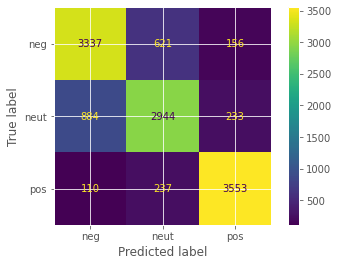

15.285339295864105


In [11]:
#results
print("cv results ", cv_results)
print(' ')
print("classification report")
print(sm.classification_report(y, predicted))
print(' ')
print("accuracy", sm.accuracy_score(y, predicted))
print(' ')
print("precision", sm.precision_score(y, predicted, average='macro'))
print(' ')
print("f1", sm.precision_score(y, predicted, average='weighted'))
print(' ')
print("jaccard", sm.jaccard_score(y, predicted, average='macro'))
print(' ')
print("matthews corr", sm.matthews_corrcoef(y, predicted))
print(' ')
print("cohen's kapp", sm.cohen_kappa_score(y, predicted))
print(' ')
print("confusion matrix")
cm = sm.confusion_matrix(y, predicted, labels=model_NB.classes_)
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_NB.classes_)
disp.plot()
plt.show()
end_time=time.time()
print((end_time-start_time)/60)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=['pos', 'neut', 'neg'])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    model_NB
)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

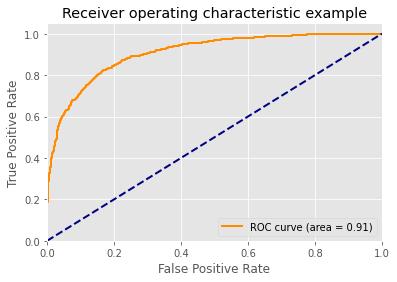

In [13]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [14]:
y_score
predicted = classifier.predict(X_test)
predicted

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 0]])

In [15]:
df_prob = pd.DataFrame(y_score, columns=['prob_yes', 'prob_neut', 'prob_neg'])
df_pred = pd.DataFrame(predicted, columns=['pred_yes', 'pred_neut', 'pred_neg'])
df_prob['pred_yes'] = df_pred['pred_yes']
df_prob['pred_neut'] = df_pred['pred_neut']
df_prob['pred_neg'] = df_pred['pred_neg']


In [16]:
y_score

array([[0.03280689, 0.06312   , 0.0923027 ],
       [0.22502369, 0.03076074, 0.05647295],
       [0.02424548, 0.08799111, 0.23880821],
       ...,
       [0.03207273, 0.55128941, 0.07141664],
       [0.57876372, 0.02168947, 0.02573461],
       [0.0029757 , 0.08118075, 0.09587898]])

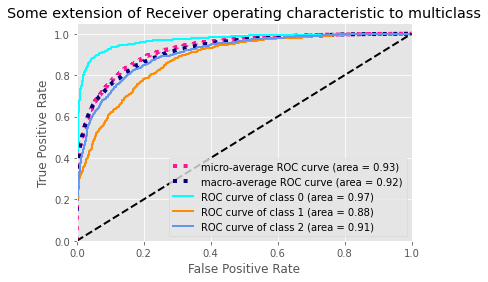

In [17]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [18]:
'''#Choose Multinomial NB as model ( to get app running, change later)
model_used = classifier.fit(X,y)

# save the model to disk
filename = 'finalized_onevsrest_model.sav'
dump(model_used, open(filename, 'wb'))'''

"#Choose Multinomial NB as model ( to get app running, change later)\nmodel_used = classifier.fit(X,y)\n\n# save the model to disk\nfilename = 'finalized_onevsrest_model.sav'\ndump(model_used, open(filename, 'wb'))"

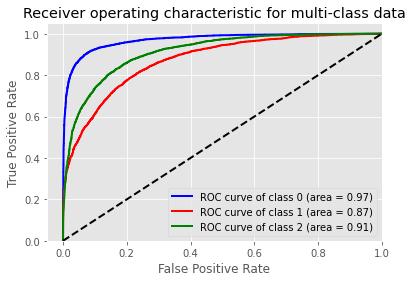

In [19]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


clf = OneVsRestClassifier(model_NB)
y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [20]:
vectorizer.get_feature_names_out()

array(['aaaaaany', 'aaaaaany day', 'aaaaaany day dread', ..., 'zum',
       'zum give', 'zum give strange'], dtype=object)